In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 10 # Size of NxN lattice


def initial_lattice(N):
    '''
    Returns initial lattice
    
    Args:
        N: int
    Returns:
        lattice: array(int, size = [N,N])
    '''
    lattice = 2*np.random.randint(2,size=[N,N])-1
    return lattice

a=initial_lattice(N)
a

array([[-1, -1,  1, -1, -1,  1, -1, -1,  1, -1],
       [-1, -1,  1, -1,  1,  1, -1, -1,  1, -1],
       [ 1,  1,  1, -1,  1,  1,  1,  1,  1, -1],
       [ 1, -1, -1,  1,  1, -1, -1, -1, -1,  1],
       [-1,  1,  1, -1,  1, -1, -1, -1,  1, -1],
       [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1,  1,  1, -1],
       [-1,  1,  1, -1,  1,  1,  1,  1, -1,  1],
       [-1,  1, -1, -1, -1, -1, -1, -1,  1, -1],
       [ 1, -1, -1, -1,  1, -1, -1, -1, -1,  1]])

In [11]:
def get_Energy(lattice):
    '''
    Calculates energy of a given lattice
    
    Args:
        lattice: array(int, size = [N,N])
    Returns:
        E: int
    '''
    E = 0
    for i in range(len(lattice)):
        for j in range(len(lattice)):
            s = lattice[i,j]
            d_s = lattice[(i+1)%N,j] + lattice[(i-1)%N, j] + lattice[i, (j+1)%N] + lattice[i, (j-1)%N]
            E += -s*d_s/4.
    return E

def get_Mag(lattice):
    '''
    Calculares magnetisation of a given lattice
    
    Args:
        lattice: array(int, size = [N,N])
    Returns:
        mag: int
    '''
    mag = np.sum(lattice)
    return mag

print('Energy=',get_Energy(a),',','Magnetisation=',get_Mag(a))

Energy= -16 , Magnetisation= -22


In [12]:
def Metropolis(lattice, t, Beta, energy):
    '''
    Metropolis algorithm for a given lattice, Beta for t time steps.
    Calculates magnetisation and energy for each time step.
    
    Args:
        lattice: array(int, size = [N,N])
        t: int
        Beta: float
        energy: int
    returns:
        net_spins: array(float, size = t)
        net_energy: array(float, size = t)
    '''
    net_energy = np.zeros(t)
    net_spins = np.zeros(t)
    for i in range(t):
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = lattice[x,y]
        spin_f = -spin_i
        E_i = 0
        E_f = 0
        d_s = lattice[(x+1)%N,y] + lattice[(x-1)%N, y] + lattice[x, (y+1)%N] + lattice[x, (y-1)%N]
        E_i += -spin_i*d_s
        E_f += -spin_f*d_s
        Delta_E = E_f - E_i
        if Delta_E <= 0:
            lattice[x,y] = spin_f
            energy += Delta_E
        elif (Delta_E > 0)*(np.random.random() < np.exp(-Delta_E*Beta)):
            lattice[x,y] = spin_f
            energy += Delta_E
        net_energy[i] = energy
        net_spins[i] = lattice.sum()
    return net_spins, net_energy

Metropolis(a,10,0.2,get_Energy(a))

(array([-24., -22., -24., -26., -24., -22., -20., -22., -22., -22.]),
 array([-16., -12., -12., -16., -16., -20., -24., -28., -28., -28.]))

In [13]:
s, e = Metropolis(initial_lattice(N),10000,0.5,get_Mag(initial_lattice(N)))

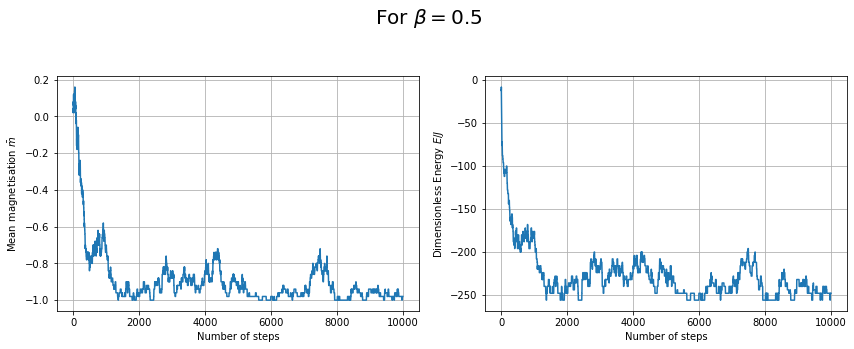

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(s/N**2)
ax.set_xlabel('Number of steps')
ax.set_ylabel(r'Mean magnetisation $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(e)
ax.set_xlabel('Number of steps')
ax.set_ylabel(r'Dimensionless Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'For $\beta=$0.5', y=1.2, size=20)
plt.show()

In [19]:
def get_e_s(lattice, BJs):
    '''
    Returns mean magnetisation, mean energy and standard deviation of an energy for certain values of BJ
    
    Args:
        lattice: array(int, size = [N,N])
        BJs: float
    Returns:
        ms: float
        E_means: float
        E_stds: float
    '''
    ms = np.zeros(len(BJs))
    E_means = np.zeros(len(BJs))
    E_stds = np.zeros(len(BJs))
    for i, bj in enumerate(BJs):
        spins, energies = Metropolis(lattice, 100000, bj, get_Energy(lattice))
        ms[i] = spins[-10000:].mean()/N**2      # mean and standard deviation for 10000 neighbours
        E_means[i] = energies[-10000:].mean()
        E_stds[i] = energies[-10000:].std()
    return ms, E_means, E_stds  

In [28]:
# Here I use get_e_s of a list of floats in order to plot returned values
BJs = np.arange(0.1, 3, 0.05)
ms_n, E_means_n, E_stds_n = get_e_s(initial_lattice(N), BJs)

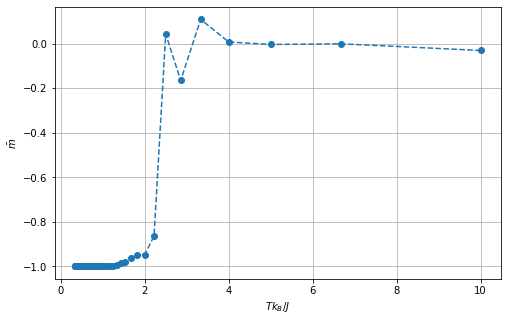

In [33]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, ms_n, 'o--')
plt.xlabel(r'$Tk_B/J$')
plt.ylabel(r'$\bar{m}$')
plt.grid()
plt.show()

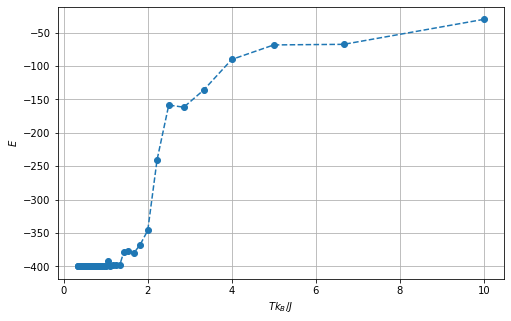

In [34]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, E_means_n, 'o--')
plt.xlabel(r'$Tk_B/J$')
plt.ylabel(r'$E$')
plt.grid()
plt.show()

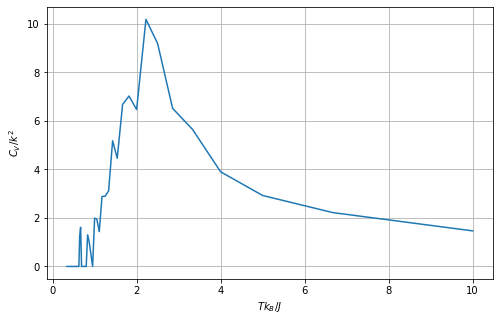

In [35]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, E_stds_n*BJs)
plt.xlabel(r'$Tk_B/J$')
plt.ylabel(r'$C_V / k^2$')
plt.grid()
plt.show()